In [ ]:
"""
Tutorial:10X Visium
In this tutorial, we show how to apply TriCLFF to identify spatial domains on 10X Visium data. As a example, we analyse the 151672 sample of the dorsolateral prefrontal cortex 
(DLPFC) dataset. Maynard et al. has manually annotated DLPFC layers and white matter (WM) based on the morphological features and gene markers. We derived the preprocessed 
data from the HumanPilot package, including manual annotations. Before running the model, please download the input data via 
https://github.com/LieberInstitute/HumanPilot.The 10X folder of the HumanPilot download package contains tissue_hires_image.png,tissue_positions_list.csv, and 
scalefactors_json.json files for each of the 12 DLPFC data. Other data such as filtered_feature_bc_matrix.h5,151672_full_image.tif, etc. can be downloaded 
in the Raw data section of the linked page above. The annotation (metadata.tsv) for 151672 slice can be downloaded from 
https://github.com/JinmiaoChenLab/SEDR_analyses/tree/master/data/DLPFC/151672. 
"""

In [ ]:
"""The following passage is a specific explanation and description of the code in train.py."""
"""
The train.py mainly includes loading package, reading ST data, Training the model(extracting the respective features of multi-modal data and saving the embedding obtained 
from each modality), and clustering. To be specific:
1.seed_torch(seed) is mainly used to set global random seeds in PyTorch projects to ensure the reproducibility of the model training process; 
2.read various parameter configurations, including the learning rate, network structure, data path, and the relevant probabilities of data augmentation, etc. 
3.the datasets were loaded, the necessary input files includes: 1) gene expression matrix: filtered_feature_bc_matrix.h5; 2) Spatial coordinates: 
tissue_positions_list.csv; 3) Histology image: the format should be .tif or .png. In the example, position inforamtion has been saved in adata.obsm[‘spatial’]. 
To make the model can read the data sucessfully, please ensure the same format input file as example. 
4.various perturbation strategies, such as masking, adding Gaussian noise, and gene exchange, were applied to the gene expression data to enhance the robustness of the model. 
5.In the model construction part, the multimodal feature extraction network SpaCLR was initialized for fusing graph structure, gene expression and Histology images information. 
The AdamW optimizer was adopted to optimize the model. TriCLFF model aims to extract features from multi-modal data by making full use of gene expressions, 
spatial location information and Histology images information in a self-supervised learning way. After model training, the embeddings of multi-modal data (xg, xg1, xi) 
are extracted and fused. Finally, the clustering performance (ARI values) are calculated through the get_predicted_results function. The obtained embedding results are 
saved as three.npy files for subsequent spatial clustering analysis and visualization.
"""

In [1]:
%run train.py

Namespace(backbone='swin_s', batch_size=64, ckpt_path='last.pth', dataset='SpatialLIBD', device='cuda', epochs=30, gene_preprocess='hvg', img_size=112, is_load=False, is_train=True, last_dim=30, log_name='log_name', lr=0.0001, n_gene=3000, name='151672', num_workers=15, p_drop=0.3, path='/root/autodl-tmp/ConGI/data/DLPFC', pct_mask=0.2, pct_noise=0.8, pct_swap=0.1, prob_mask=0.5, prob_noise=0.5, prob_swap=0.5, sigma_noise=0.5, w_g2g=0.1, w_g2i=1, w_graph_loss=0.5, w_i2i=0.1, w_recon=0.3, w_s2g=0.1, w_s2i=1, w_s2s=0.1)
------Calculating spatial graph...
The graph contains 23382 edges, 4015 cells.
5.8237 neighbors per cell on average.
------Calculating spatial graph...
The graph contains 23382 edges, 4015 cells.
5.8237 neighbors per cell on average.
Calculateing adj matrix using xy only...


0it [00:00, ?it/s]
100%|██████████| 63/63 [00:12<00:00,  5.24it/s, loss=5.127]
R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.1
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%
Adjusted rand index = 0.112
Ari value(z) :  0.1123691683463143
fitting ...
  |======================================================================| 100%
Adjusted rand index = 0.221
Ari value(xg) :  0.22119383404102136
fitting ...
  |======================================================================| 100%
Adjusted rand index = 0.091
Ari value(xg1) :  0.09130726898576824
fitting ...
  |======================================================================| 100%
Adjusted rand index = 0.019
Ari value(xi) :  0.019301603560139522


100%|██████████| 63/63 [00:12<00:00,  5.19it/s, loss=4.813]


fitting ...
  |======================================================================| 100%
Adjusted rand index = 0.561
Ari value(z) :  0.5613646961216485
fitting ...
  |======================================================================| 100%
Adjusted rand index = 0.555
Ari value(xg) :  0.5547595030381061
fitting ...
  |======================================================================| 100%
Adjusted rand index = 0.091
Ari value(xg1) :  0.091475826788256
fitting ...
  |======================================================================| 100%
Adjusted rand index = 0.106
Ari value(xi) :  0.10565000082517531


100%|██████████| 63/63 [00:12<00:00,  5.05it/s, loss=4.788]


fitting ...
  |======================================================================| 100%
Adjusted rand index = 0.582
Ari value(z) :  0.5822724541024402
fitting ...
  |======================================================================| 100%
Adjusted rand index = 0.443
Ari value(xg) :  0.4431927738665921
fitting ...
  |======================================================================| 100%
Adjusted rand index = 0.084
Ari value(xg1) :  0.08423454415638465
fitting ...
  |======================================================================| 100%
Adjusted rand index = 0.144
Ari value(xi) :  0.1443169555977399


100%|██████████| 63/63 [00:12<00:00,  5.11it/s, loss=4.768]


fitting ...
  |======================================================================| 100%
Adjusted rand index = 0.584
Ari value(z) :  0.5841601773042966
fitting ...
  |======================================================================| 100%
Adjusted rand index = 0.566
Ari value(xg) :  0.5662088171775508
fitting ...
  |======================================================================| 100%
Adjusted rand index = 0.116
Ari value(xg1) :  0.11573760271779428
fitting ...
  |======================================================================| 100%
Adjusted rand index = 0.091
Ari value(xi) :  0.091351465357004


In [ ]:
"""Import the dependency packages required when reading in the three saved embeddings later"""

In [2]:
import os
import random
import numpy as np
import scanpy as sc
import torch
from torch.utils.data import DataLoader
import argparse
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import cdist
from collections import defaultdict
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score, silhouette_score
from dataset import Dataset
from model import SpaCLR, TrainerSpaCLR
from utils import get_predicted_results, load_ST_file
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
"""
After model training, you can load the saved multi-modal feature embeddings (xg, xg1, xi) and then perform a weighted summation of the embeddings to obtain a final embedding z.
z is used as input of the get_predicted_results function for spatial clustering. In our experiment, we use mclust tool for spaital clustering and save the predicted clustering 
labels as CSV files. It is an inference and result export module in the spatial transcriptome clustering task. This step enables the model to integrate complementary information
from multiple modalities for improved spatial domain identification. For quantitative assessment, we use well-known ARI metric to evaulate the performance.
"""

In [ ]:
xg = np.load(f'embeddings/{args.name}_xg.npy')
xg1 = np.load(f'embeddings/{args.name}_xg1.npy')
xi = np.load(f'embeddings/{args.name}_xi.npy')
a1=0.5
b1=0.1
z = xg + xg1*a1 + b1*xi
ari, pred_label = get_predicted_results(args.dataset, args.name, args.path, z)
if not os.path.exists("output"):
    os.mkdir("output")
pd.DataFrame({"cluster_labels": pred_label.tolist()}).to_csv(
    "output/151672/" + f"{args.name}_pred.csv")

fitting ...
  |======================================================================| 100%
Adjusted rand index = 0.584


In [4]:
ari

0.5841601773042966

In [ ]:
"""
integrates the clustering results into the spatial transcriptomics object for further analysis. Specifically, we loads the spatial transcriptomics data 
using load_ST_file, reads the predicted cluster labels from a CSV file, filters out invalid predictions (i.e., label -1), and assigns the cleaned cluster labels to 
the obs attribute of the AnnData object under the column name 'TriCLFF'. This step facilitates downstream analyses such as spatial visualization and marker gene detection 
based on the predicted spatial domains. 
"""

In [5]:
adata = load_ST_file(os.path.join(args.path, args.name))
pred = pd.read_csv(f'output/151672/151672_pred1.csv')['cluster_labels']
pred = pred[pred != -1]
adata.obs['TriCLFF'] = pred.array.astype(str)

In [6]:
adata

AnnData object with n_obs × n_vars = 4015 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'TriCLFF'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [ ]:
"""plotting spatial clustering result"""

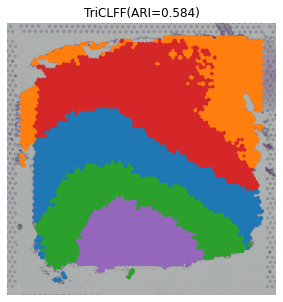

In [7]:
plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.spatial(adata, img_key="hires", color=["TriCLFF"], title='TriCLFF(ARI=%.3f)'%ari, legend_loc=None, frameon=False,size=1.8,show=False)
plt.savefig("./TriCLFF_151672_new1.pdf")